# Wine Quality 

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).


Content


Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score 

#np.set_printoptions(suppress=True)

In [2]:
df=pd.read_csv('C:\\Users\\imvv44\\Downloads\\winequalityN.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.shape

(6497, 13)

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
#fill null values
for col,value in df.items():
    if col!='type':
        df[col]=df[col].fillna(df[col].mean())

In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

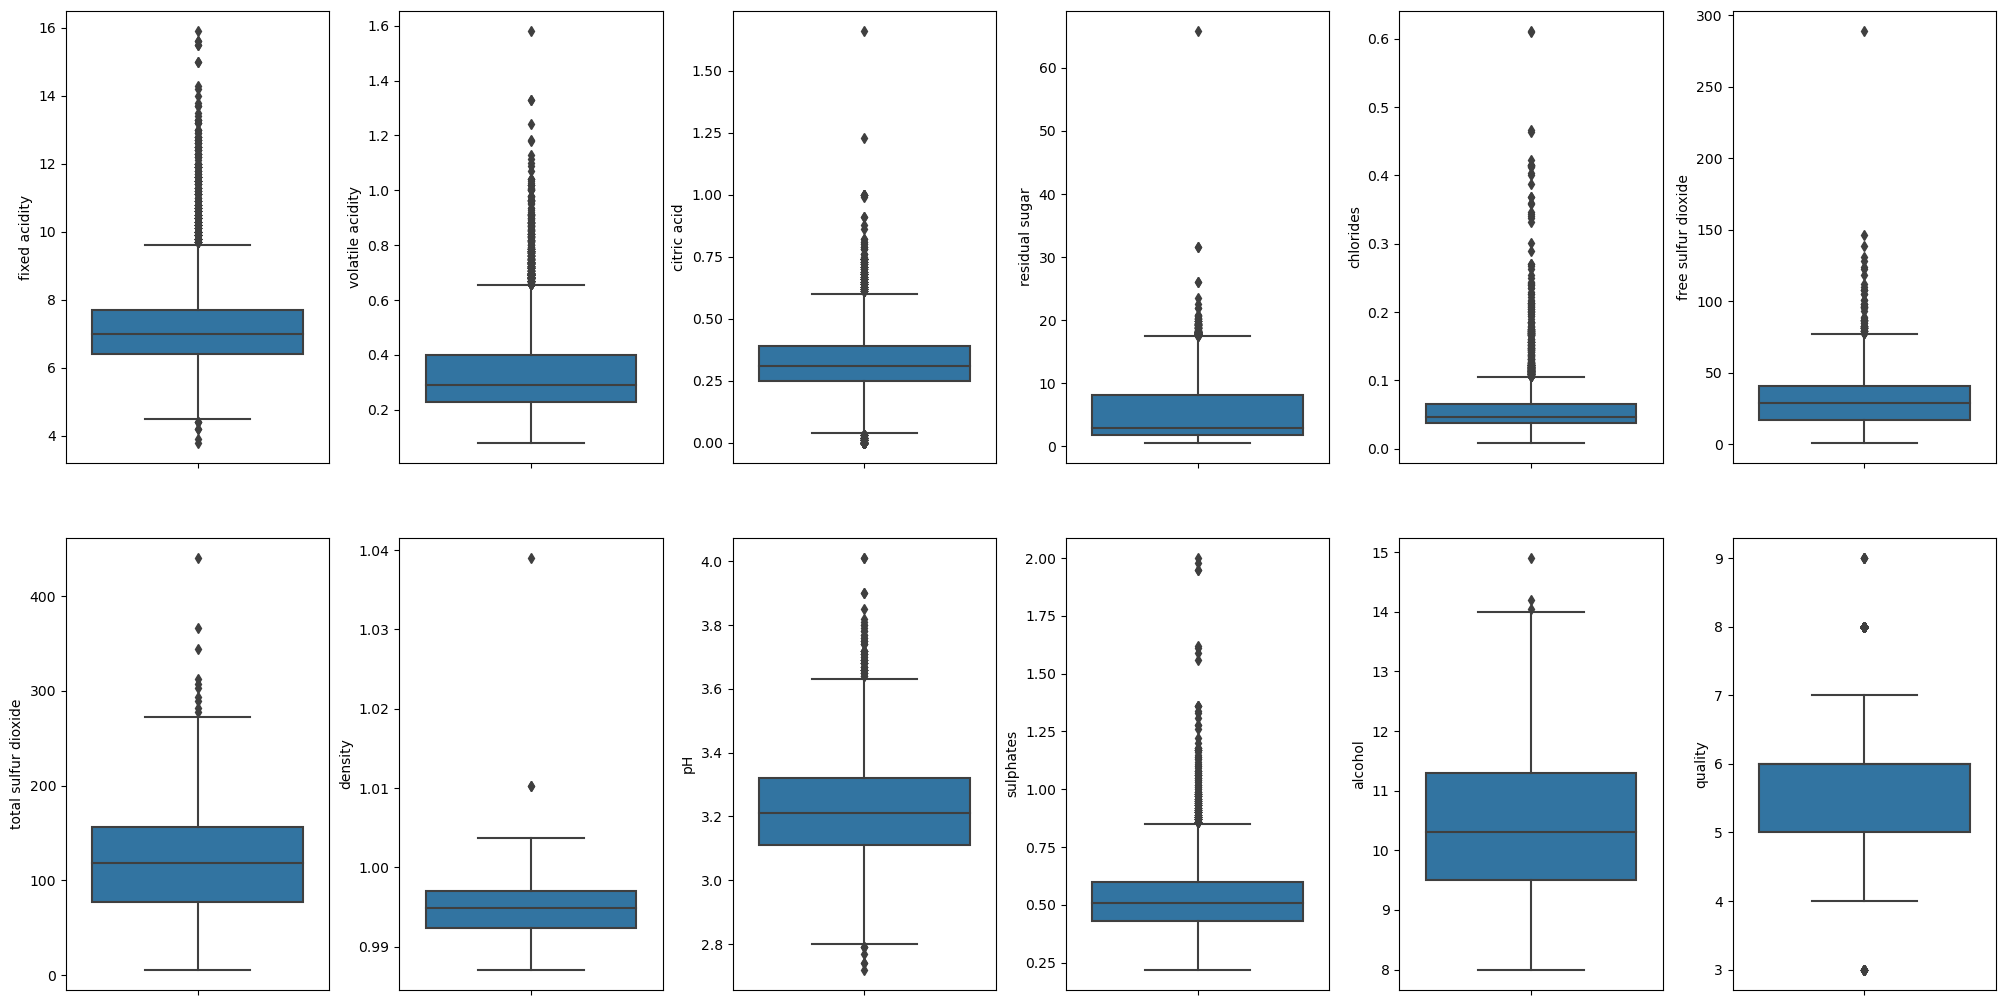

In [11]:
# creating plots in shape of different boxes
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
# to make the graphs look good, we will add this line in code
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# type

In [12]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

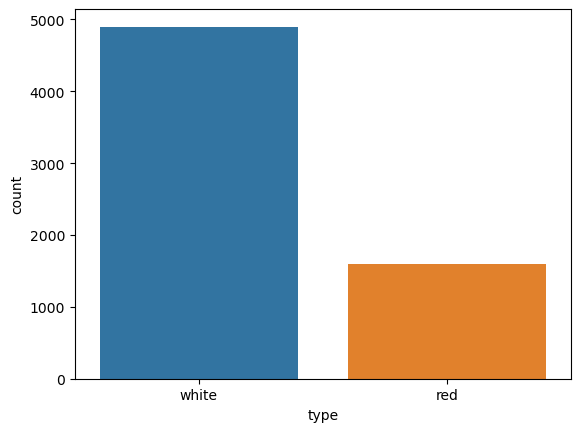

In [13]:
sns.countplot(df.type)

# fixed acidity

In [14]:
df['fixed acidity'].value_counts()

6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
14.20      1
3.90       1
3.80       1
6.45       1
12.10      1
Name: fixed acidity, Length: 107, dtype: int64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

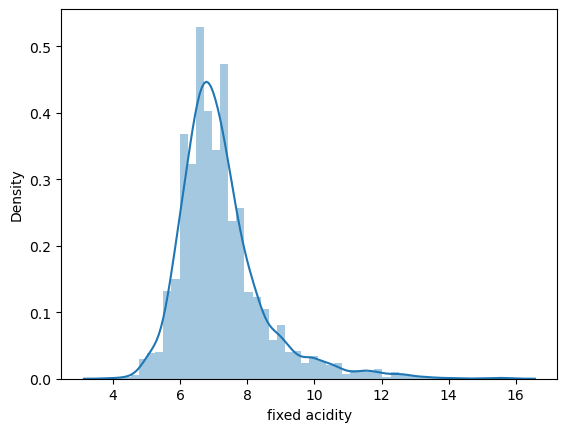

In [15]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='fixed acidity'>

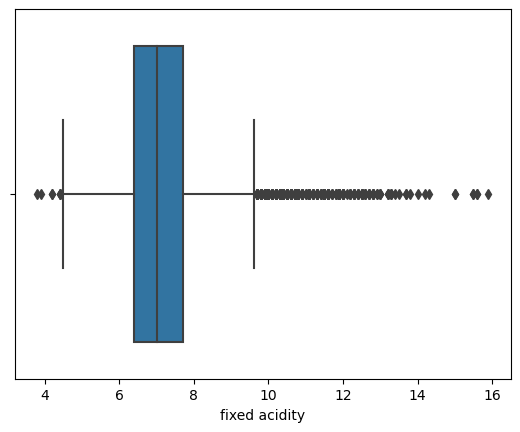

In [16]:
sns.boxplot(df['fixed acidity'])

In [17]:
q3=df['fixed acidity'].quantile(0.75)
q1=df['fixed acidity'].quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df['fixed acidity']=np.where(df['fixed acidity']>upper,upper,df['fixed acidity'])
df['fixed acidity']=np.where(df['fixed acidity']<lower,lower,df['fixed acidity'])

<AxesSubplot:xlabel='fixed acidity'>

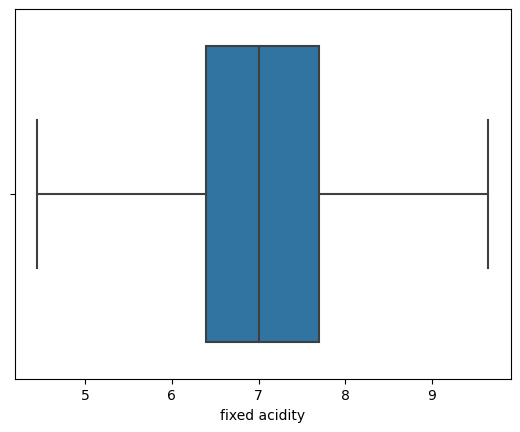

In [18]:
sns.boxplot(df['fixed acidity'])

# volatile acidity

In [19]:
df['volatile acidity'].value_counts()

0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: volatile acidity, Length: 188, dtype: int64

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

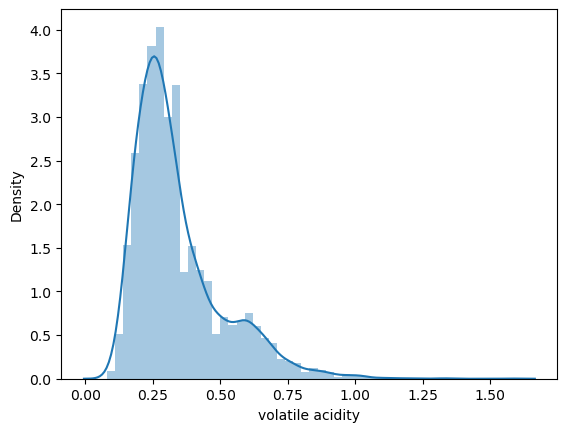

In [20]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='volatile acidity'>

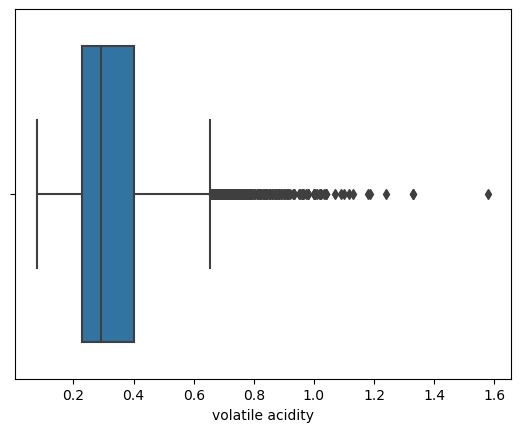

In [21]:
sns.boxplot(df['volatile acidity'])

In [22]:
q3=df['volatile acidity'].quantile(0.75)
q1=df['volatile acidity'].quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df['volatile acidity']=np.where(df['volatile acidity']>upper,upper,df['volatile acidity'])
df['volatile acidity']=np.where(df['volatile acidity']<lower,lower,df['volatile acidity'])

<AxesSubplot:xlabel='volatile acidity'>

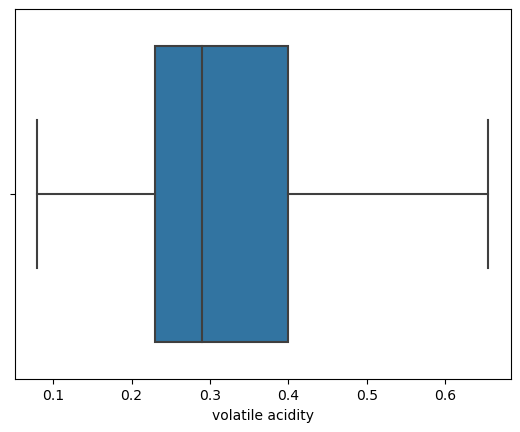

In [23]:
sns.boxplot(df['volatile acidity'])

# citric acid

In [24]:
df['citric acid'].value_counts()

0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
0.99      1
1.23      1
0.86      1
0.88      1
0.75      1
Name: citric acid, Length: 90, dtype: int64

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

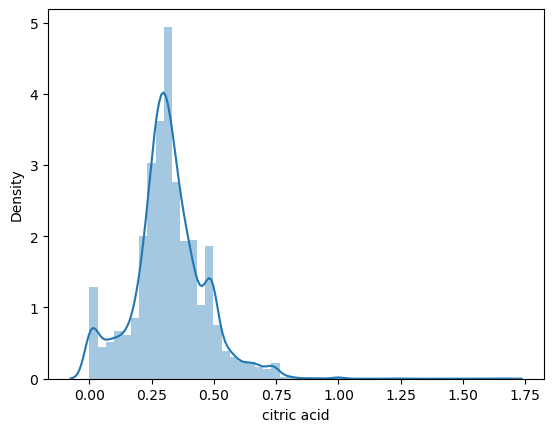

In [25]:
sns.distplot(df['citric acid'])

<AxesSubplot:xlabel='citric acid'>

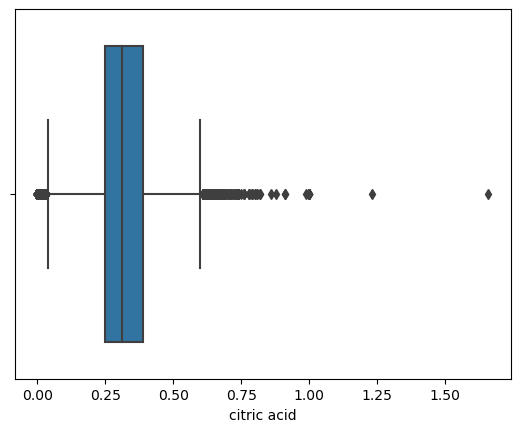

In [26]:
sns.boxplot(df['citric acid'])

In [27]:
q3=df['citric acid'].quantile(0.75)
q1=df['citric acid'].quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df['citric acid']=np.where(df['citric acid']>upper,upper,df['citric acid'])
df['citric acid']=np.where(df['citric acid']<lower,lower,df['citric acid'])

<AxesSubplot:xlabel='citric acid'>

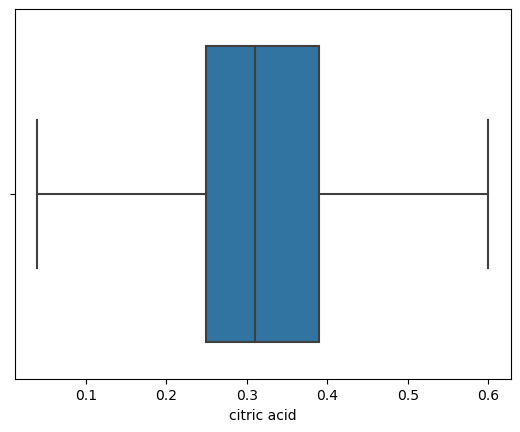

In [28]:
sns.boxplot(df['citric acid'])

# residual sugar

In [29]:
df['residual sugar'].value_counts()

2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
6.35       1
15.25      1
3.15       1
18.50      1
3.45       1
Name: residual sugar, Length: 317, dtype: int64

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

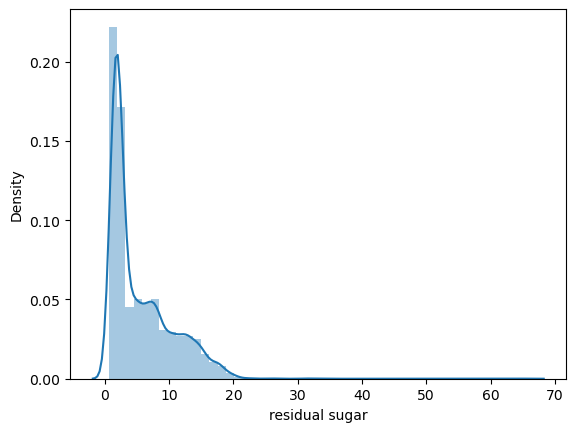

In [30]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='residual sugar'>

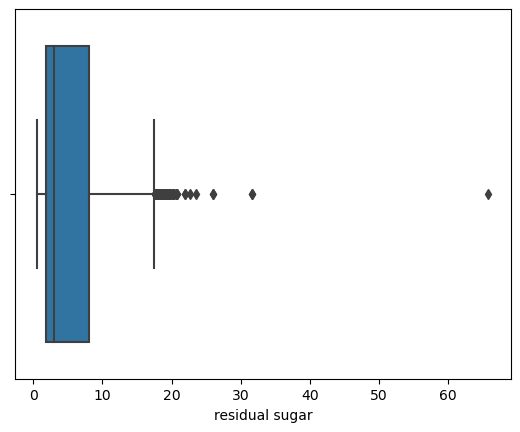

In [31]:
sns.boxplot(df['residual sugar'])

In [32]:
q3=df['residual sugar'].quantile(0.75)
q1=df['residual sugar'].quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df['residual sugar']=np.where(df['residual sugar']>upper,upper,df['residual sugar'])
df['residual sugar']=np.where(df['residual sugar']<lower,lower,df['residual sugar'])

<AxesSubplot:xlabel='residual sugar'>

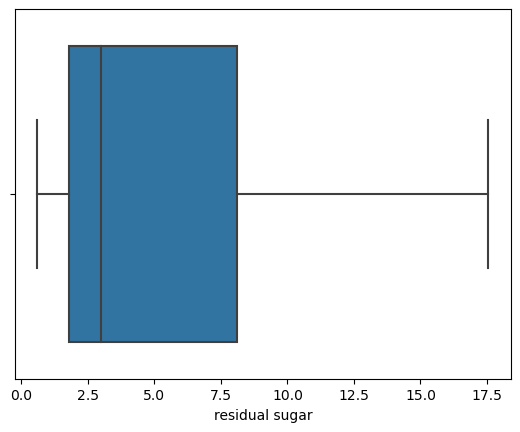

In [33]:
sns.boxplot(df['residual sugar'])

# chlorides

In [34]:
df.chlorides.value_counts()

0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.209      1
0.149      1
0.144      1
0.013      1
0.230      1
Name: chlorides, Length: 215, dtype: int64

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

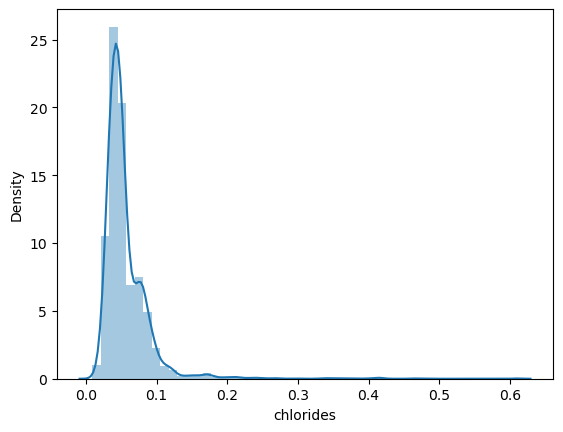

In [35]:
sns.distplot(df.chlorides)

<AxesSubplot:xlabel='chlorides'>

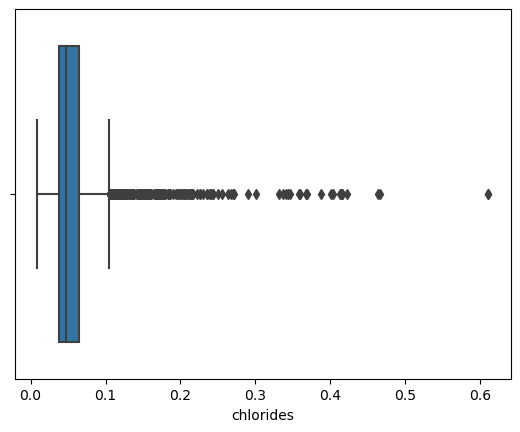

In [36]:
sns.boxplot(df.chlorides)

In [37]:
q3=df.chlorides.quantile(0.75)
q1=df.chlorides.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.chlorides=np.where(df.chlorides>upper,upper,df.chlorides)
df.chlorides=np.where(df.chlorides<lower,lower,df.chlorides)

<AxesSubplot:xlabel='chlorides'>

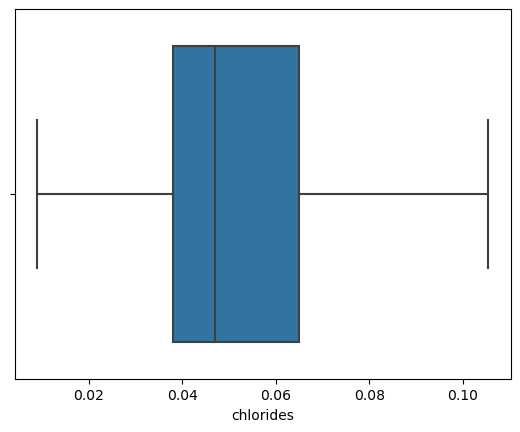

In [38]:
sns.boxplot(df.chlorides)

# free sulfur dioxide

In [39]:
df['free sulfur dioxide'].value_counts()

29.0     183
6.0      170
26.0     161
15.0     157
24.0     152
        ... 
30.5       1
138.5      1
95.0       1
124.0      1
64.5       1
Name: free sulfur dioxide, Length: 135, dtype: int64

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

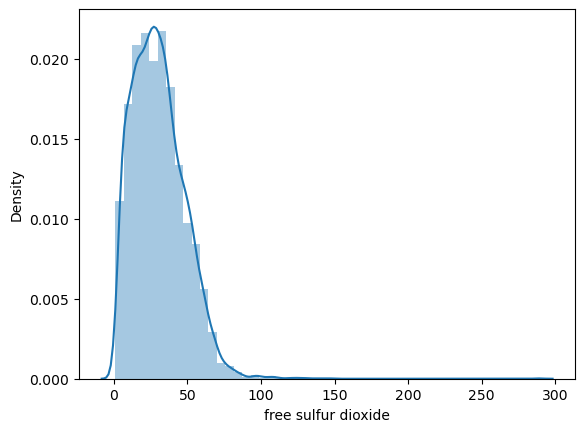

In [40]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide'>

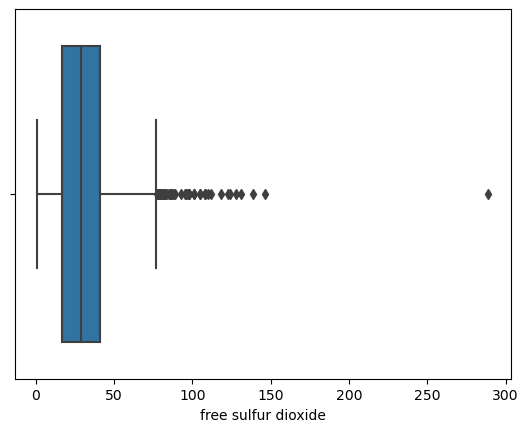

In [41]:
sns.boxplot(df['free sulfur dioxide'])

In [42]:
q3=df['free sulfur dioxide'].quantile(0.75)
q1=df['free sulfur dioxide'].quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']>upper,upper,df['free sulfur dioxide'])
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']<lower,lower,df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide'>

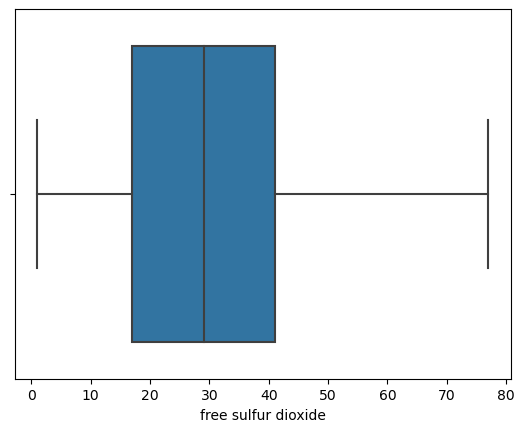

In [43]:
sns.boxplot(df['free sulfur dioxide'])

# total sulfur dioxide

In [44]:
df['total sulfur dioxide'].value_counts()

111.0    72
113.0    65
117.0    57
122.0    57
124.0    56
         ..
176.5     1
115.5     1
259.0     1
164.5     1
440.0     1
Name: total sulfur dioxide, Length: 276, dtype: int64

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

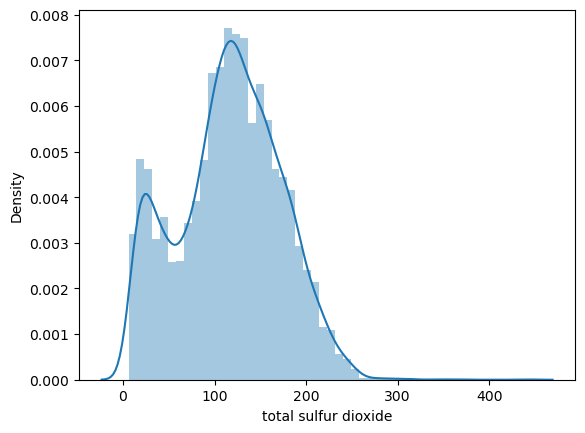

In [45]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

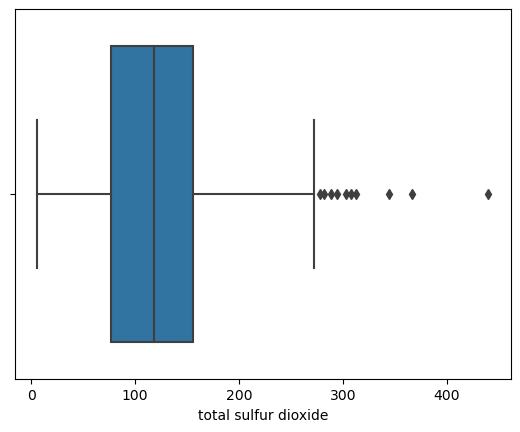

In [46]:
sns.boxplot(df['total sulfur dioxide'])

In [47]:
q3=df['total sulfur dioxide'].quantile(0.75)
q1=df['total sulfur dioxide'].quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df['total sulfur dioxide']=np.where(df['total sulfur dioxide']>upper,upper,df['total sulfur dioxide'])
df['total sulfur dioxide']=np.where(df['total sulfur dioxide']<lower,lower,df['total sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

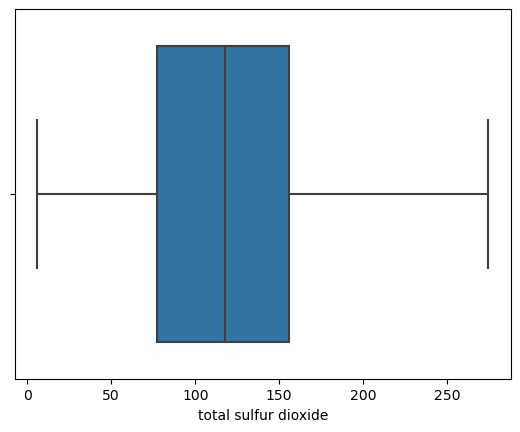

In [48]:
sns.boxplot(df['total sulfur dioxide'])

# density

In [49]:
df.density.value_counts()

0.99720    69
0.99760    69
0.99200    64
0.99800    64
0.99280    63
           ..
0.99342     1
0.99463     1
0.99081     1
0.98997     1
0.99651     1
Name: density, Length: 998, dtype: int64

<AxesSubplot:xlabel='density', ylabel='Density'>

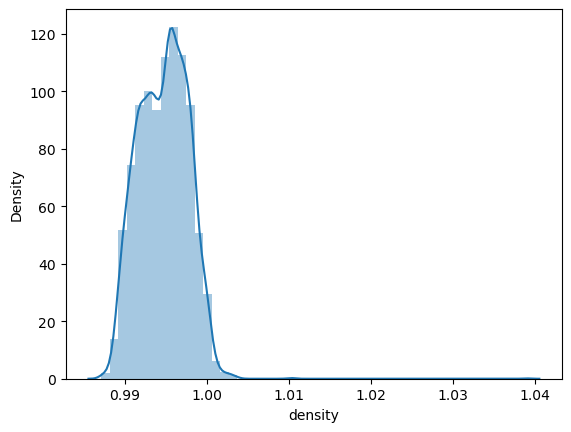

In [50]:
sns.distplot(df.density)

<AxesSubplot:xlabel='density'>

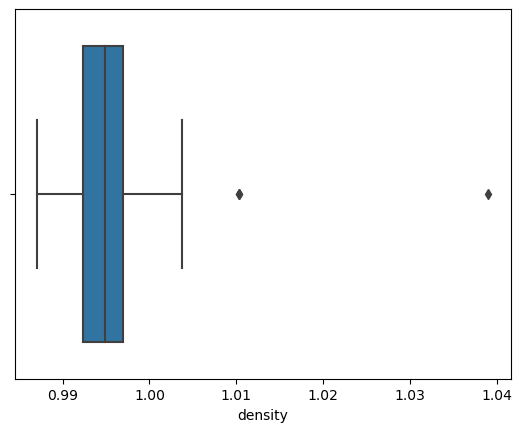

In [51]:
sns.boxplot(df.density)

In [52]:
q3=df.density.quantile(0.75)
q1=df.density.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
e=df[(df.density>upper)].index
df.drop(e,inplace=True)

<AxesSubplot:xlabel='density'>

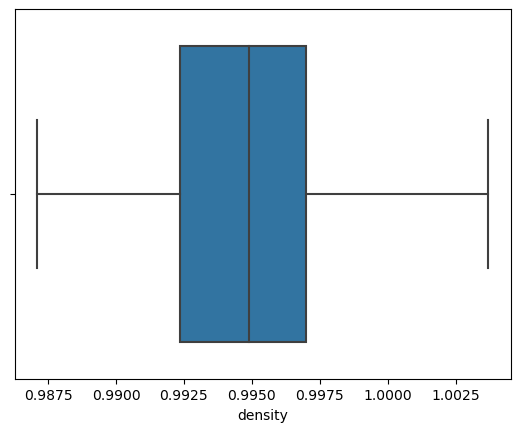

In [53]:
sns.boxplot(df.density)

# pH

In [54]:
df.pH.value_counts()

3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
2.82      1
3.81      1
3.82      1
3.85      1
2.72      1
Name: pH, Length: 109, dtype: int64

<AxesSubplot:xlabel='pH', ylabel='Density'>

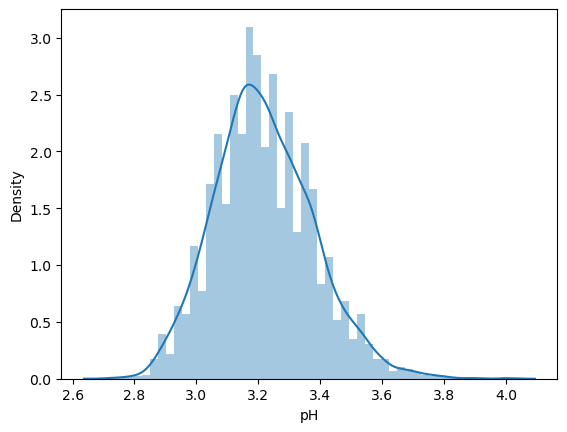

In [55]:
sns.distplot(df.pH)

<AxesSubplot:xlabel='pH'>

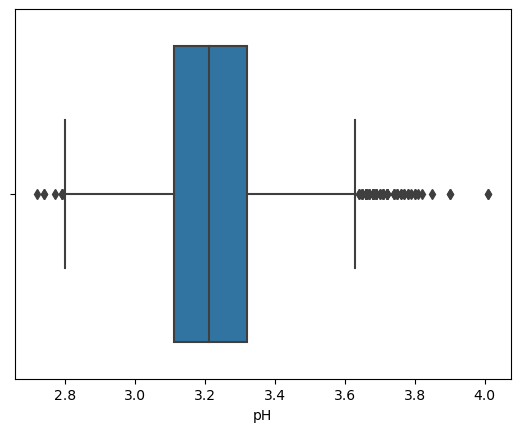

In [56]:
sns.boxplot(df.pH)

In [57]:
q3=df.pH.quantile(0.75)
q1=df.pH.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.pH=np.where(df.pH>upper,upper,df.pH)
df.pH=np.where(df.pH<lower,lower,df.pH)

<AxesSubplot:xlabel='pH'>

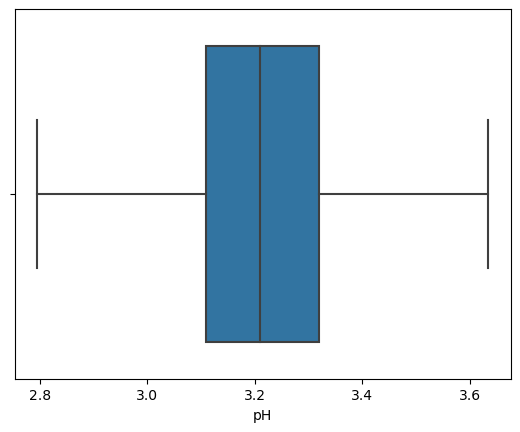

In [58]:
sns.boxplot(df.pH)

# sulphates

In [59]:
df.sulphates.value_counts()

0.50    275
0.46    243
0.54    234
0.44    232
0.38    212
       ... 
1.20      1
1.56      1
0.23      1
0.22      1
1.33      1
Name: sulphates, Length: 112, dtype: int64

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

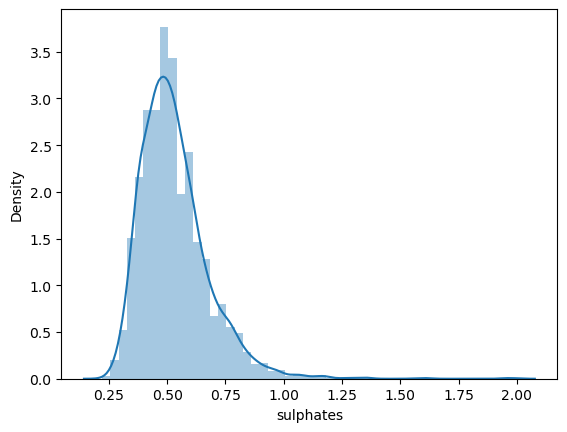

In [60]:
sns.distplot(df.sulphates)

<AxesSubplot:xlabel='sulphates'>

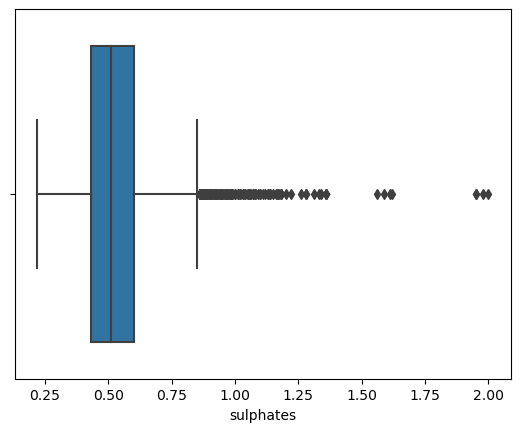

In [61]:
sns.boxplot(df.sulphates)

In [62]:
q3=df.sulphates.quantile(0.75)
q1=df.sulphates.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.sulphates=np.where(df.sulphates>upper,upper,df.sulphates)
df.sulphates=np.where(df.sulphates<lower,lower,df.sulphates)

<AxesSubplot:xlabel='sulphates'>

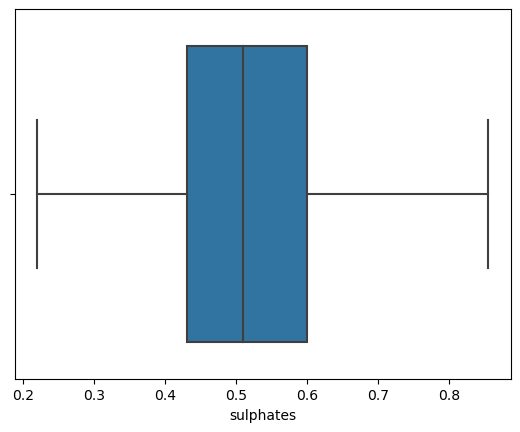

In [63]:
sns.boxplot(df.sulphates)

# alcohol

In [64]:
df.alcohol.value_counts()

9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
10.533333      1
11.366667      1
12.333333      1
14.050000      1
10.750000      1
Name: alcohol, Length: 111, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

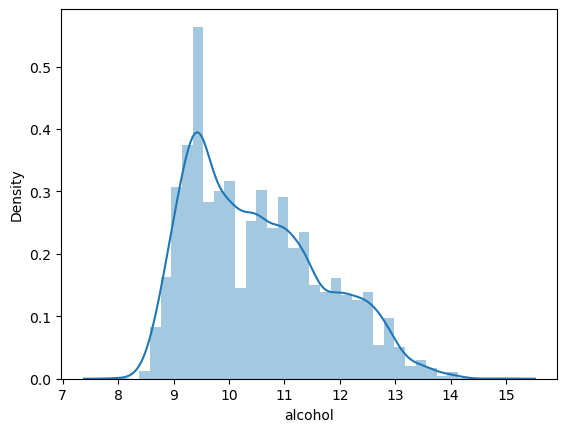

In [65]:
sns.distplot(df.alcohol)

<AxesSubplot:xlabel='alcohol'>

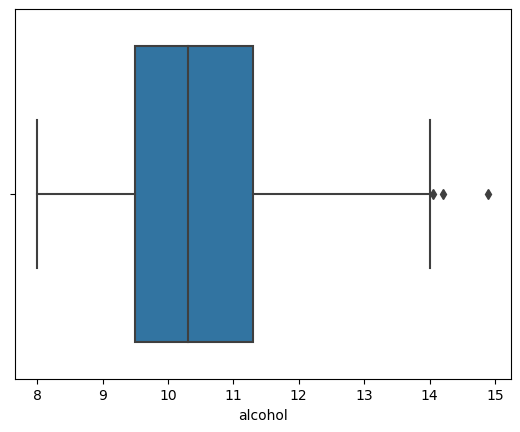

In [66]:
sns.boxplot(df.alcohol)

In [67]:
q3=df.alcohol.quantile(0.75)
q1=df.alcohol.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
r=df[(df.alcohol>upper)].index


In [68]:
df.drop(r,inplace=True)

<AxesSubplot:xlabel='alcohol'>

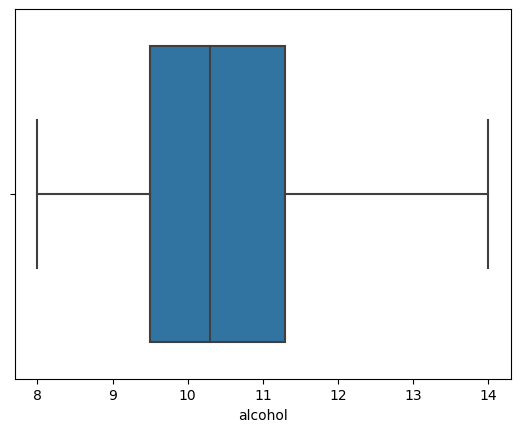

In [69]:
sns.boxplot(df.alcohol)

# quality

In [70]:
df.quality.value_counts()

6    2833
5    2137
7    1077
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

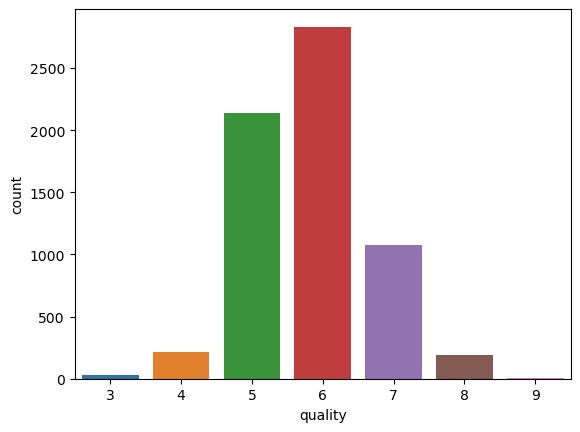

In [71]:
sns.countplot(df.quality)

In [72]:
bins = [0,5,10]


labels = [0, 1] # 'low'=0, 'high'=1

df['quality_range']= pd.cut(x=df['quality'], bins=bins, labels=labels)

print(df[['quality_range','quality']].head(5))

df_bins = df.drop('quality', axis=1) 

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


In [73]:
df_bins.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [74]:
from sklearn.utils import resample

In [75]:
df_bins.quality_range.value_counts()

1    4108
0    2383
Name: quality_range, dtype: int64

In [76]:
one=df_bins[df_bins.quality_range==1]
zero=df_bins[df_bins.quality_range==0]

In [77]:
over=resample(zero,replace=True,n_samples=len(one),random_state=25)

In [78]:
df=pd.concat([one,over])

In [79]:
df.quality_range.value_counts()

0    4108
1    4108
Name: quality_range, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le=LabelEncoder()
df.type=le.fit_transform(df.type)

In [82]:
x=df.iloc[:,:-1]


In [83]:
x

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,17.55,0.0450,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.60,0.0490,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.90,0.0500,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.50,0.0580,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.50,0.0580,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
3379,1,7.6,0.360,0.49,11.30,0.0460,77.0,221.0,0.99840,3.01,0.43,9.2
5797,0,8.3,0.655,0.04,3.40,0.0840,6.0,11.0,0.99892,3.48,0.49,11.0
1728,1,6.8,0.300,0.24,6.60,0.1055,35.0,116.0,0.99530,3.07,0.48,9.4
5231,0,8.4,0.560,0.08,2.10,0.1050,16.0,44.0,0.99580,3.13,0.52,11.0


In [84]:
y=df.iloc[:,-1]


# Random Forest

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=123)

In [87]:
model_params={'n_estimators':[300,400,500],
              'max_features':['sqrt',0.25],
              'min_samples_split':[2,4,6]
             }

In [88]:
rf=RandomForestClassifier()

In [89]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [90]:
clf=GridSearchCV(rf,model_params,cv=5)


In [91]:
clf.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [300, 400, 500]})

In [92]:
rf = clf.best_estimator_

In [93]:
y_pred=rf.predict(xtest)

In [97]:
pd.crosstab(ytest,y_pred,margins=True,rownames=['Actual'],colnames=['predict'])

predict,0,1,All
Actual,,,
0,1517,149,1666
1,207,1414,1621
All,1724,1563,3287


In [99]:
grid_search_acc=accuracy_score(ytest,y_pred)
grid_search_acc

0.8916945543048372

In [100]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1666
           1       0.90      0.87      0.89      1621

    accuracy                           0.89      3287
   macro avg       0.89      0.89      0.89      3287
weighted avg       0.89      0.89      0.89      3287



In [101]:
prob=rf.predict_proba(xtest)
prob

array([[0.52702857, 0.47297143],
       [0.31796667, 0.68203333],
       [0.9755381 , 0.0244619 ],
       ...,
       [0.01580952, 0.98419048],
       [0.32534286, 0.67465714],
       [0.85791429, 0.14208571]])

In [105]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9565614648080084


In [106]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9565614648080084


In [107]:
#randomsearch

In [118]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [119]:
params={
    'n_estimators':[800,900,1000.1100],
    'max_features':['log2',0.25],
    'min_samples_split':[2,4,6]
}

In [120]:
gd=RandomizedSearchCV(rf,params)

In [121]:
gd.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_features': ['log2', 0.25],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [800, 900, 1000.11]})

In [122]:
b=gd.best_estimator_
b

RandomForestClassifier(max_features=0.25, min_samples_split=4, n_estimators=900,
                       random_state=30)

In [123]:
rf=RandomForestClassifier(n_estimators=1000)

In [124]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [125]:
y_pred_rand=rf.predict(xtest)

In [126]:
confusion_matrix(ytest,y_pred_rand)

array([[1518,  148],
       [ 210, 1411]], dtype=int64)

In [127]:
random_search_acc=accuracy_score(ytest,y_pred_rand)
random_search_acc

0.891086096744752

# Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt=DecisionTreeClassifier(random_state=20)

In [130]:
parm={'max_depth':[10,20,30]}

In [131]:
grid=GridSearchCV(dt,parm)

In [132]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_depth': [10, 20, 30]})

In [133]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=20, random_state=20)

In [134]:
dt=DecisionTreeClassifier(max_depth=20, random_state=20)

In [135]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=20, random_state=20)

In [136]:
y_pred_dec=dt.predict(xtest)

In [137]:
confusion_matrix(ytest,y_pred_dec)

array([[1480,  186],
       [ 307, 1314]], dtype=int64)

In [138]:
decision_tree_acc=accuracy_score(ytest,y_pred_dec)
decision_tree_acc

0.8500152114390022

In [139]:
#classification Report
print(classification_report(ytest,y_pred_dec))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1666
           1       0.88      0.81      0.84      1621

    accuracy                           0.85      3287
   macro avg       0.85      0.85      0.85      3287
weighted avg       0.85      0.85      0.85      3287



# SVM

In [140]:
from sklearn.svm import SVC
from sklearn import svm

In [141]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced',probability=True) 
td_svc = svc.fit(xtrain,ytrain)
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [142]:
y_pred_lin = td_svc.predict(xtest)
len(y_pred_lin)

3287

In [143]:
svm_acc=accuracy_score(ytest,y_pred_lin)
svm_acc

0.6431396410100395

In [144]:
print(confusion_matrix(ytest,y_pred_lin))

[[1277  389]
 [ 784  837]]


In [145]:
print(classification_report(ytest,y_pred_lin))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1666
           1       0.68      0.52      0.59      1621

    accuracy                           0.64      3287
   macro avg       0.65      0.64      0.64      3287
weighted avg       0.65      0.64      0.64      3287



# KNN

In [146]:
params={'n_neighbors':np.arange(1,40,1)}

In [147]:
gd.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_features': ['log2', 0.25],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [800, 900, 1000.11]})

In [148]:
gd.best_params_

{'n_estimators': 900, 'min_samples_split': 4, 'max_features': 'log2'}

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn=KNeighborsClassifier(n_neighbors=1000,algorithm='ball_tree')
knn.fit(xtrain,ytrain)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1000)

In [151]:
y_pred_knn=knn.predict(xtest)

In [152]:
#accuracy score
knn_ball_tree_acc=accuracy_score(ytest,y_pred_knn)
knn_ball_tree_acc

0.5908122908427137

In [153]:
print(classification_report(ytest,y_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1666
           1       0.59      0.57      0.58      1621

    accuracy                           0.59      3287
   macro avg       0.59      0.59      0.59      3287
weighted avg       0.59      0.59      0.59      3287



In [154]:
confusion_matrix(ytest,y_pred_knn)

array([[1016,  650],
       [ 695,  926]], dtype=int64)

In [155]:
knn=KNeighborsClassifier(n_neighbors=1100,algorithm='kd_tree')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1100)

In [156]:
y_pred_knn=knn.predict(xtest)

In [157]:
knn_kd_tree_acc=accuracy_score(ytest,y_pred_knn)
knn_kd_tree_acc

0.5859446303620323

# Naive Bayes

In [158]:
from  sklearn.naive_bayes import GaussianNB

In [159]:
gn=GaussianNB()

In [160]:
gn.fit(xtrain,ytrain)

GaussianNB()

In [161]:
y_pred_nb=gn.predict(xtest)

In [162]:
naive_bayes_acc=accuracy_score(ytest,y_pred_nb)
naive_bayes_acc

0.7033769394584728

# Accuracy Score

In [163]:
print('Accuracy for Decision_tree method:',decision_tree_acc*100)
print('Accuracy for Random forest_Gridsearch method:',grid_search_acc*100)
print('Accuracy for Random forest_Randomsearch:',random_search_acc*100)
print('Accuracy for Naive_Bayes_classifier:', naive_bayes_acc*100)
print('Accuracy for KNN kd tree:',knn_kd_tree_acc*100)
print('Accuracy for KNN ball tree:',knn_ball_tree_acc*100)
print('Accuracy for SVM:',svm_acc*100)


Accuracy for Decision_tree method: 85.00152114390022
Accuracy for Random forest_Gridsearch method: 89.16945543048372
Accuracy for Random forest_Randomsearch: 89.1086096744752
Accuracy for Naive_Bayes_classifier: 70.33769394584728
Accuracy for KNN kd tree: 58.59446303620322
Accuracy for KNN ball tree: 59.08122908427137
Accuracy for SVM: 64.31396410100395
